## 0. Imports

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv( '/Users/Felipe/Documents/Projetos/Data Science/Python do ZERO ao DS/2. Extração e Manipulação de Dados/kc_house_data.csv')

### 1. Crie uma nova coluna chamada: “dormitory_type”
#### Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
#### Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
#### Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [4]:
data['dormitory_type'] = 'NA'

In [5]:
data['dormitory_type'] = data['dormitory_type'].astype(str)

In [6]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dormitory_type     object
dtype: object

In [7]:
for cont in range(len(data)):
    if data.loc[cont, 'bedrooms'] == 1:
        data.loc[cont, 'dormitory_type'] = 'studio'
    elif data.loc[cont, 'bedrooms'] == 2:
        data.loc[cont, 'dormitory_type'] = 'apartment'
    elif data.loc[cont, 'bedrooms'] > 2:
        data.loc[cont, 'dormitory_type'] = 'house'
    else: data.loc[cont, 'dormitory_type'] = 'NA'     
                  

In [8]:
np.unique(data['dormitory_type'])

array(['NA', 'apartment', 'house', 'studio'], dtype=object)

## 2. Faça um gráﬁco de barras que represente a soma dos preços pelo número de quartos.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

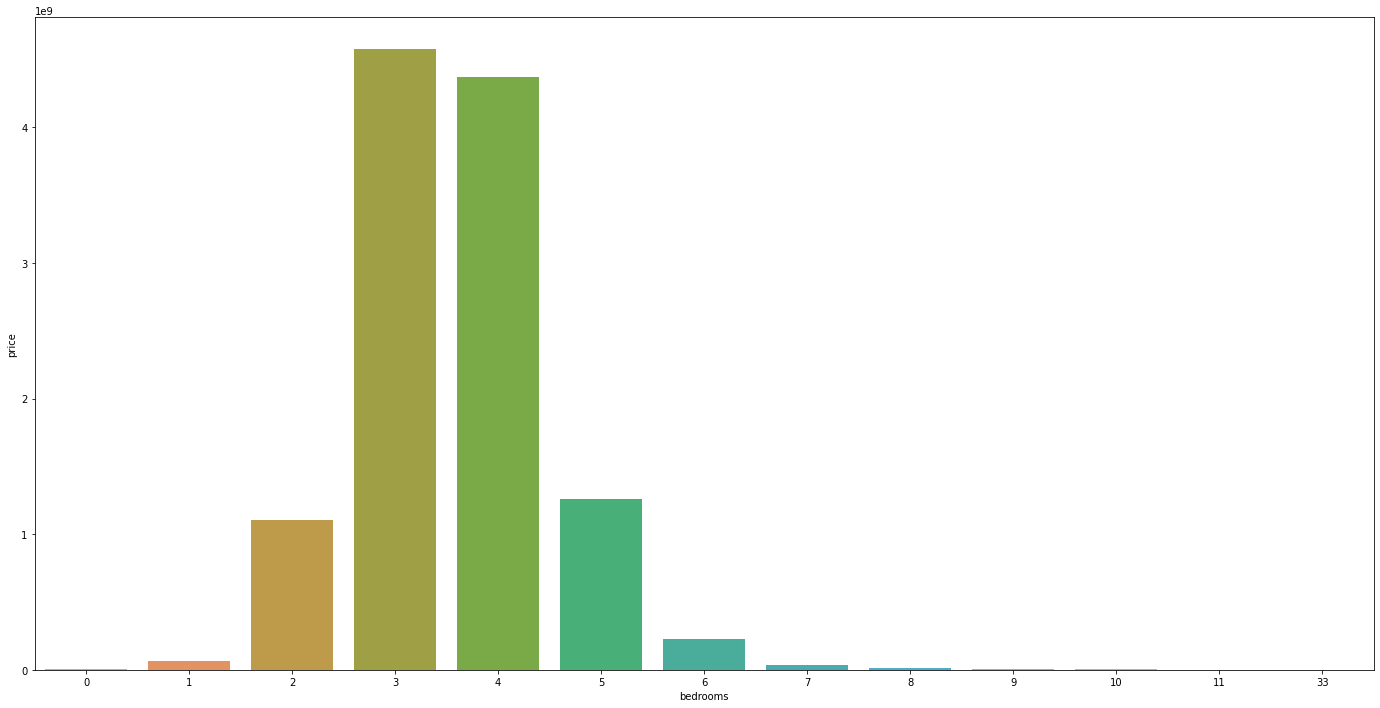

In [9]:
plt.figure(figsize=(24, 12))
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms', y='price', data=df)


## 3. Faça um gráﬁco de linhas que represente a média dos preços pelo ano construção dos imóveis.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

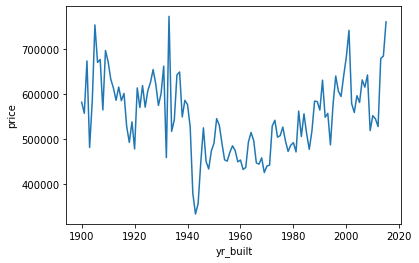

In [10]:
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

sns.lineplot(x='yr_built', y='price', data=df)

In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartment
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


## 4. Faça um gráﬁco de barras que represente a média dos preços pelo tipo dos dormitórios.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

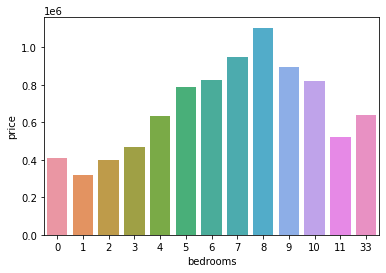

In [12]:
#data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()

sns.barplot(x='bedrooms', y='price', data=df)

## 5. Faça um gráﬁco de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

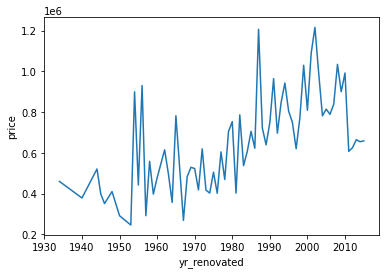

In [13]:
#data.loc[data['yr_renovated'] > 0, 'yr_renovated']

df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

df.head()

sns.lineplot(x='yr_renovated', y='price', data=df)


In [14]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartment
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


## 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [20]:
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

df.head()

,dormitory_type,price
0,NA,409503.846154
1,apartment,401372.681884
2,house,563092.211899
3,studio,317642.884422


## 7. Crie um Dashboard com os gráﬁcos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

<BarContainer object of 13 artists>

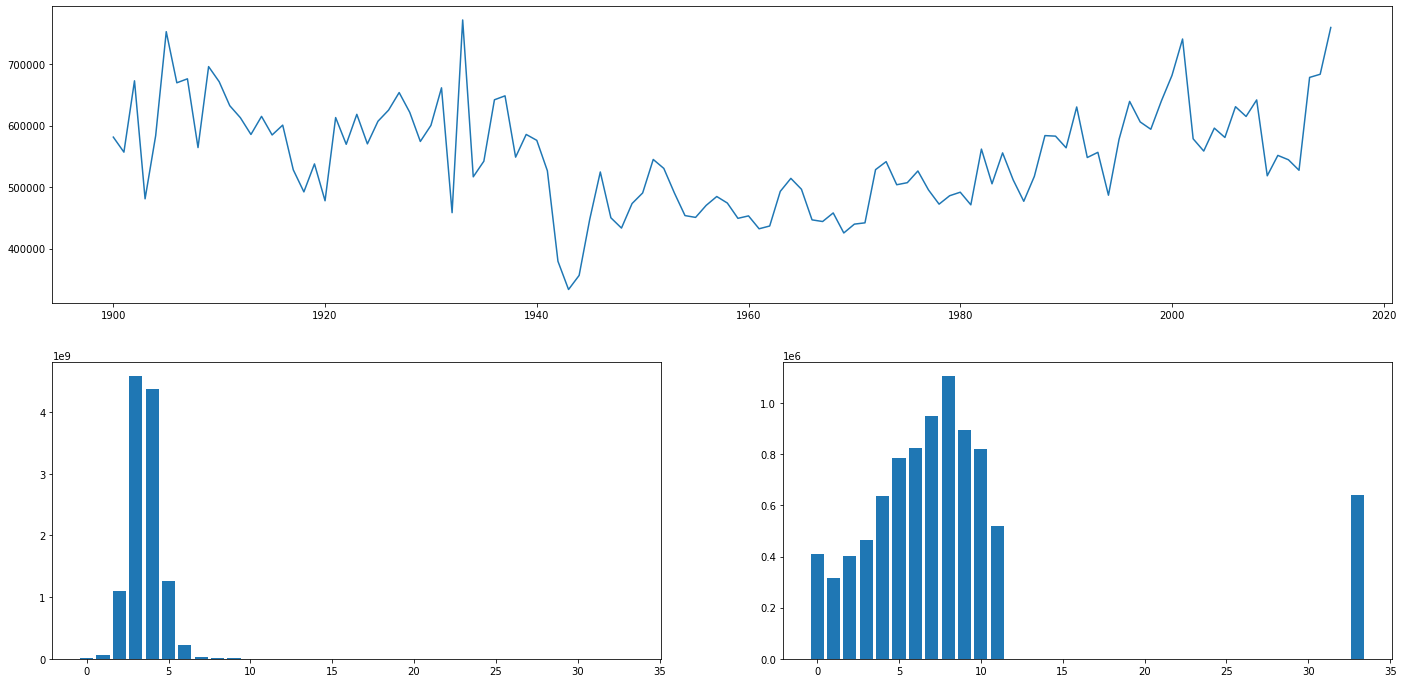

In [23]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) #1a linha e as 2 colunas
ax2 = fig.add_subplot(specs[1, 0]) #2a linha e 1a coluna
ax3 = fig.add_subplot(specs[1, 1]) #3a linha e 2a coluna

# questão 02
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar(df['bedrooms'], df['price'])

# questão 03
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(df['yr_built'], df['price'])

# questão 04
df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
ax3.bar(df['bedrooms'], df['price'])
